# Histopathologic Cancer Detection

GitHub Repository: https://github.com/niju789/Histopathologic-Cancer-Detection

## 1 - Introduction

### 1.1 - Problem

This project aims to develop and train a convolutional neural network (CNN) to classify images based on whether the image contains tumour tissue.

### 1.2 - Data

The data provided is already split into training and testing sets. The training set contains 220,025 images. The testing set contains 57,458 images. The images are 96 x 96 TIFF files of pathology scans.

## 2 - Exploratory Data Analysis (EDA)

### 2.1 - Data Inspection and Cleaning

#### 2.1.1 - Training Labels

In [1]:
import pandas as pd

# Load train_labels.csv
train_labels_df = pd.read_csv('./data/train_labels.csv')

In [2]:
# Show first 5 rows of train_labels
train_labels_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


Remove rows with missing values.

In [3]:
print(train_labels_df.shape)
train_labels_df = train_labels_df.dropna()
print(train_labels_df.shape)

(220025, 2)
(220025, 2)


No rows were dropped since there were no missing values. However, whether the values in the "label" column are valid should be checked.

In [4]:
# Print the unique values in the "label" column
print(train_labels_df['label'].unique())

[0 1]


The "label" column contains only values that are either 0 or 1, which means the data in this column is valid.

#### 2.1.2 - Images

Load and preprocess the training images.

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def load_and_preprocess_image(file_path):
    img = load_img(file_path)
    # Convert image to an array and take the center 32 x 32 pixel region
    img_array = img_to_array(img)[32:64, 32:64, :]
    # Normalize the pixel values to be between 0 and 1
    img_array /= 255.0
    return img_array

In [6]:
train_images = []
train_labels = []

for _, img in train_labels_df.iterrows():
    file_path = f'./data/train/{img["id"]}.tif'
    img_array = load_and_preprocess_image(file_path)
    train_images.append(img_array)
    train_labels.append(img['label'])

In [7]:
import numpy as np

train_images = np.array(train_images)
train_labels = np.array(train_labels)

#### 2.1.3 - Data Cleaning Conclusion

The data loaded from "train_labels.csv" did not require any data cleaning. For the training images, the data cleaning procedure included extracting only the center 32 x 32 pixel region and normalizing the pixel values to between 0 and 1.

### 2.2 - Data Visualization

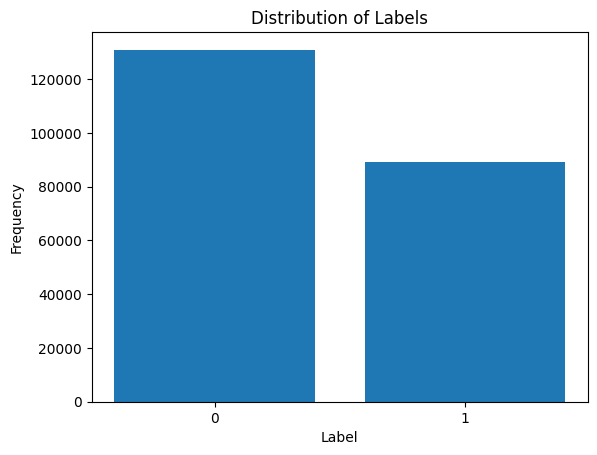

In [8]:
import matplotlib.pyplot as plt

# Get the unique training label values and their counts
values, counts = np.unique(train_labels, return_counts=True)

plt.bar(values.astype(str), counts)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.show()

The distribution of labels for training images is somewhat uneven. However, due to the high amount of training samples, this should not be an issue.

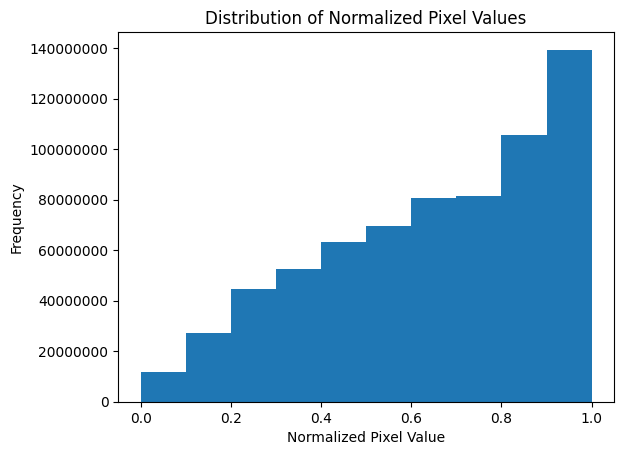

In [9]:
plt.hist(train_images.flatten())
plt.ticklabel_format(style='plain')
plt.xlabel('Normalized Pixel Value')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Pixel Values')
plt.show()

The higher the normalized pixel value, the higher the frequency at which they appear in the training images.

### 2.3 - Plan of Analysis

Based on the EDA, there is no need to significantly alter the usual process for image classification. The only effect that the EDA has on the analysis is that the model must be designed to work with 32 x 32 images rather than the original dimension of these images which is 96 x 96.

## 3 - Model Architecture

### 3.1 - Archictectures to Compare

Two different model architectures will be compared.

#### 3.1.1 - Architecture 1

Input - 32 x 32 image with 3 channels (RGB)<br>
Convolutional layer - 32 filters of size 3 x 3<br>
ReLU activation<br>
Pooling layer - Max pool of size 2 x 2<br>
Convolutional layer - 64 filters of size 3 x 3<br>
ReLU activation<br>
Pooling layer - Max pool of size 2 x 2<br>
Fully connected layer - 64 neurons<br>
ReLU activation<br>
Output layer - 1 neuron with Sigmoid activation

Reasoning: 3 x 3 filters seem to be the most suitable for this problem since the dimensions of the images are somewhat small and 5 x 5 or any filter of a higher dimension seem too large. ReLU activations are used after the convolutional layers since this is the most commonly used activation function when dealing with image classification using a CNN. Pooling layers that use max pool of size 2 x 2 are used after the ReLU activations. The size 2 x 2 seems to be the most appropriate for this problem since any size greater than this seems too large given the dimensions of the images. The output layer uses the Sigmoid activation function since this is a binary classification problem where the output should be between 0 and 1.

#### 3.1.2 - Architecture 2

Input - 32 x 32 image with 3 channels (RGB)<br>
Convolutional layer - 32 filters of size 3 x 3<br>
ReLU activation<br>
Pooling layer - Max pool of size 2 x 2<br>
Convolutional layer - 64 filters of size 3 x 3<br>
ReLU activation<br>
Pooling layer - Max pool of size 2 x 2<br>
Convolutional layer - 128 filters of size 3 x 3<br>
ReLU activation<br>
Pooling layer - Max pool of size 2 x 2<br>
Fully connected layer - 128 neurons<br>
ReLU activation<br>
Fully connected layer - 64 neurons<br>
ReLU activation<br>
Output layer - 1 neuron with Sigmoid activation

Reasoning: The reasoning remains the same as for the previous architecture. The notable differences are the additional convolutional layer and the additional fully connected layer.

### 3.2 - Hyperparameters

Due to limited resources in terms of computing power and time, the hyperparameters that will be considered are those involved in training a neural network.

The hyperparameters that will be tuned are:
- Batch size
- Number of epochs

## 4 - Results and Analysis

### 4.1 - Hyperparameter Tuning

As part of the hyperparameter tuning, the performances of the two model architectures will be compared and the selection of the best model will be based on the hyperparameters and the architecture with the best performance.

For each of the two model architectures, the hyperparameter tuning procedure will consider 10 and 20 as values for the number of epochs and 64, 128, and 256 as values for the batch size.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Define and return the model with the architecture specified in 3.1.1 - Architecture 1
def create_model_1():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define and return the model with the architecture specified in 3.1.2 - Architecture 2
def create_model_2():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=123
)

# Hyperparameters and values considered
num_epochs = [10, 20]
batch_sizes = [64, 128, 256]

# Stores validation accuracies for each hyperparameter combination
val_accs_1 = {}
val_accs_2 = {}

arch_1 = { 'id': 1, 'create_model': create_model_1, 'val_accs': val_accs_1 }
arch_2 = { 'id': 2, 'create_model': create_model_2, 'val_accs': val_accs_2 }

best_val_acc = 0
best_h_params = { 'num_epochs': None, 'batch_size': None }
best_arch = None
best_hp_model = None

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

for arch in [arch_1, arch_2]:
    arch_id = arch['id']
    create_model = arch['create_model']
    val_accs = arch['val_accs']
    for epochs in num_epochs:
        val_accs[epochs] = {}
        for batch_size in batch_sizes:
            print(f'Model architecture: {arch_id}, # of epochs: {epochs}, batch size: {batch_size}')
            model = create_model()
            early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
            history = model.fit(
                X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(X_val, y_val),
                callbacks=[early_stopping],
                verbose=0
            )
            val_acc = max(history.history['val_accuracy'])
            print(f'Validation accuracy: {val_acc}')
            val_accs[epochs][batch_size] = val_acc
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_h_params['num_epochs'] = epochs
                best_h_params['batch_size'] = batch_size
                best_arch = arch_id
                best_hp_model = model

Model architecture: 1, # of epochs: 10, batch size: 64
Validation accuracy: 0.8199068307876587
Model architecture: 1, # of epochs: 10, batch size: 128
Validation accuracy: 0.8216566443443298
Model architecture: 1, # of epochs: 10, batch size: 256
Validation accuracy: 0.8201113343238831
Model architecture: 1, # of epochs: 20, batch size: 64
Validation accuracy: 0.8194750547409058
Model architecture: 1, # of epochs: 20, batch size: 128
Validation accuracy: 0.8346324563026428
Model architecture: 1, # of epochs: 20, batch size: 256
Validation accuracy: 0.8144301772117615
Model architecture: 2, # of epochs: 10, batch size: 64
Validation accuracy: 0.8199068307876587
Model architecture: 2, # of epochs: 10, batch size: 128
Validation accuracy: 0.8255879878997803
Model architecture: 2, # of epochs: 10, batch size: 256
Validation accuracy: 0.8264742493629456
Model architecture: 2, # of epochs: 20, batch size: 64
Validation accuracy: 0.8147937655448914
Model architecture: 2, # of epochs: 20, batc

In [12]:
print(f'Best validation accuracy: {best_val_acc}')
print(f'Best model architecture: {best_arch}')
print(f'Best number of epochs: {best_h_params["num_epochs"]}')
print(f'Best batch size: {best_h_params["batch_size"]}')

Best validation accuracy: 0.8346324563026428
Best model architecture: 1
Best number of epochs: 20
Best batch size: 128


The model with architecture 1 trained with a batch size of 128 over 20 epochs gave the best validation accuracy.

### 4.2 - Techniques to Improve Training or Performance

#### 4.2.1 - L2 Regularization

Having L2 regularization in the fully connected layers may reduce any overfitting.

In [13]:
from tensorflow.keras.regularizers import l2

# Return model with architecture 2 with L2 regularization added
def create_model_l2(factor):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(factor)),
        Dense(64, activation='relu', kernel_regularizer=l2(factor)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=123
)

# Regularization factors considered
factors = [0.001, 0.01, 0.1, 1.0]

# Stores validation accuracies for each regularization factor
val_accs_l2 = {}

best_val_acc = 0
best_factor = None
best_l2_model = None

In [14]:
for factor in factors:
    print(f'Regularization factor: {factor}')
    model = create_model_l2(factor)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        batch_size=best_h_params['batch_size'],
        epochs=best_h_params['num_epochs'],
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )
    val_acc = max(history.history['val_accuracy'])
    print(f'Validation accuracy: {val_acc}')
    val_accs_l2[factor] = val_acc
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_factor = factor
        best_l2_model = model

Regularization factor: 0.001
Validation accuracy: 0.822156548500061
Regularization factor: 0.01
Validation accuracy: 0.816634476184845
Regularization factor: 0.1
Validation accuracy: 0.8319736123085022
Regularization factor: 1.0
Validation accuracy: 0.8053402900695801


In [15]:
print(f'Best validation accuracy: {best_val_acc}')
print(f'Best factor: {best_factor}')

Best validation accuracy: 0.8319736123085022
Best factor: 0.1


The regularization factor that gave the best validation accuracy was 0.1. However, the accuracy is about the same (slightly lower too) compared to the model without regularization. Therefore, in further analysis, a model with regularization will not be used.

#### 4.2.2 - Dropout Layers

Dropout layers will be used in the model to reduce the number of neurons and possibly reduce overfitting.

In [16]:
from tensorflow.keras.layers import Dropout

# Return model with architecture 2 with dropout layers added
def create_model_dropout():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.25),
        Dense(64, activation='relu'),
        Dropout(0.25),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=123
)

In [17]:
dropout_model = create_model_dropout()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    batch_size=best_h_params['batch_size'],
    epochs=best_h_params['num_epochs'],
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=0
)

In [18]:
val_acc_dropout = max(history.history['val_accuracy'])
print(f'Validation accuracy: {val_acc_dropout}')

Validation accuracy: 0.8099533915519714


The validation accuracy from using dropout layers is lower compared to the model without dropout layers.

### 4.3 - Results

In [19]:
print(val_accs_1)
print(val_accs_2)

{10: {64: 0.8199068307876587, 128: 0.8216566443443298, 256: 0.8201113343238831}, 20: {64: 0.8194750547409058, 128: 0.8346324563026428, 256: 0.8144301772117615}}
{10: {64: 0.8199068307876587, 128: 0.8255879878997803, 256: 0.8264742493629456}, 20: {64: 0.8147937655448914, 128: 0.8191568851470947, 256: 0.8327008485794067}}


Hyperparameter tuning for number of epochs and batch size for architecture 1:

|| 64 Batch Size | 128 Batch Size | 256 Batch Size |
| :-: | :-: | :-: | :-: |
| **10 Epochs** | 0.820 | 0.822 | 0.820 |
| **20 Epochs** | 0.819 | 0.835 | 0.814 |

Hyperparameter tuning for number of epochs and batch size for architecture 2:

|| 64 Batch Size | 128 Batch Size | 256 Batch Size |
| :-: | :-: | :-: | :-: |
| **10 Epochs** | 0.820 | 0.826 | 0.826 |
| **20 Epochs** | 0.815 | 0.819 | 0.833 |

In [20]:
print(val_accs_l2)

{0.001: 0.822156548500061, 0.01: 0.816634476184845, 0.1: 0.8319736123085022, 1.0: 0.8053402900695801}


Validation accuracy as L2 regularization factor changes:

| L2 Regularization Factor | Validation Accuracy |
| :-: | :-: |
| 0.001 | 0.822 |
| 0.01 | 0.817 |
| 0.1 | 0.832 |
| 1.0 | 0.805 |

In [21]:
print(val_acc_dropout)

0.8099533915519714


Best accuracies achieved across techniques:

| Technique | Best Validation Accuracy |
| :-: | :-: |
| Hyperparameter Tuning | 0.835 |
| L2 Regularization | 0.832 |
| Dropout Layers | 0.810 |

### 4.4 - Test Data Prediction

Creating the submission file for the Histopathologic Cancer Detection Kaggle competition using the best model obtained after hyperparameter tuning.

In [22]:
import os

test_dir = './data/test'
test_images = []
test_ids = []

for file_name in os.listdir(test_dir):
    if file_name.endswith('.tif'):
        file_id = file_name.replace('.tif', '')
        file_path = os.path.join(test_dir, file_name)
        img_array = load_and_preprocess_image(file_path)
        test_images.append(img_array)
        test_ids.append(file_id)

test_images = np.array(test_images)

In [23]:
predictions = best_hp_model.predict(test_images)
pred_labels = (predictions > 0.5).astype(int).reshape(-1)

output = pd.DataFrame({'id': test_ids, 'label': pred_labels})
output.to_csv('output.csv', index=False)

1796/1796 [==============================] - 9s 5ms/step


The accuracy on the testing dataset was 0.771.

## 5 - Conclusion

In this project, a CNN was developed and trained with the goal of being able to classify whether pathology images contain tumour tissue or not. Two different architectures were considered and compared. Based on hyperparameter tuning, model architecture 1 had better performance and the best number of epochs was 20 and the best batch size was 128. This gave a validation accuracy of 0.835.

Two techniques to help improve the performance of the model were considered: L2 regularization and dropout layers. Adding L2 regularization did not help improve performance since the best validation accuracy obtained was 0.832. Similarly, adding dropout layers did not help improve performance since the best validation accuracy obtained was 0.810. Based on these results, it is possible that adding L2 regularization and dropout layers did not help since the model is not overfitting. In reality, the model may be underfitting since applying these techniques reduced the validation accuracy.

Some possible improvements to try in the future include increasing model complexity and trying different techniques to help improve performance. The model that was trained may be underfitting, so increasing the model complexity by adding more layers or filters/neurons per layer may help reduce any underfitting. Additionally, different techniques to help improve performance such as batch normalization could be tried to help improve performance.